In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.metrics import mutual_info_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder


def load_dataset(plant):
    print(f'loading plant {plant} data')
    train = pd.read_csv(f'../data/train_{plant}.csv', parse_dates=["时间"]).drop_duplicates().reset_index(drop=True)
    test = pd.read_csv(f'../data/test_{plant}.csv', parse_dates=["时间"])
    train.columns = ['time', 'irr', 'ws', 'wd', 'temp', 'pr', 'hm', 'mirr', 'power']
    test.columns = ['id', 'time', 'irr', 'ws', 'wd', 'temp', 'pr', 'hm']
    data = pd.concat([train, test])
    return data

PLANT = 1
data = load_dataset(PLANT)

In [4]:
data.head()

,hm,id,irr,mirr,power,pr,temp,time,wd,ws
0,-0.157895,NaN,-1.0,0.0,-0.019333,-0.030303,-0.090909,2016-04-01 00:15:00,251,-0.707547
1,-0.136842,NaN,-1.0,0.0,-0.021000,-0.030303,-0.107071,2016-04-01 00:30:00,250,-0.716981
2,-0.094737,NaN,-1.0,0.0,-0.022000,0.030303,-0.123232,2016-04-01 00:45:00,248,-0.726415
3,-0.073684,NaN,-1.0,0.0,-0.022000,0.030303,-0.135354,2016-04-01 01:00:00,244,-0.735849
4,-0.052632,NaN,-1.0,0.0,-0.022000,0.030303,-0.147475,2016-04-01 01:15:00,241,-0.754717


In [5]:
data.describe()

,hm,id,irr,mirr,power,pr,temp,wd,ws
count,78666.000000,11808.000000,78666.000000,66858.000000,66858.000000,78666.000000,78666.000000,78666.000000,78666.000000
mean,-0.035280,5904.500000,-0.564965,236.341804,2.105609,0.090092,0.047678,157.565289,-0.663030
std,0.453750,3408.820324,0.566251,342.082201,2.989093,0.281773,0.381076,94.124055,0.258608
min,-1.000000,1.000000,-1.000000,-0.020000,-0.073667,-1.000000,-1.000000,0.000000,-1.000000
25%,-0.410526,2952.750000,-1.000000,0.000000,-0.022000,-0.090909,-0.264646,90.000000,-0.849057
50%,-0.073684,5904.500000,-0.937795,2.844670,0.000000,0.090909,0.074747,111.000000,-0.726415
75%,0.326316,8856.250000,-0.153629,424.249000,4.149502,0.272727,0.349495,267.000000,-0.537736
max,1.000000,11808.000000,1.000000,1303.110000,10.485300,1.000000,1.000000,359.000000,1.000000


In [6]:
data.corr()

,hm,id,irr,mirr,power,pr,temp,wd,ws
hm,1.000000,0.442428,-0.406324,-0.436354,-0.419725,0.129351,0.159620,-0.225132,-0.114640
id,0.442428,1.000000,-0.040967,NaN,NaN,-0.134952,0.483563,-0.101094,0.048160
irr,-0.406324,-0.040967,1.000000,0.888917,0.898904,-0.110148,0.393407,-0.025794,-0.148030
mirr,-0.436354,NaN,0.888917,1.000000,0.961298,-0.052342,0.262052,0.000581,-0.156142
power,-0.419725,NaN,0.898904,0.961298,1.000000,-0.028451,0.234637,0.016333,-0.173595
pr,0.129351,-0.134952,-0.110148,-0.052342,-0.028451,1.000000,-0.374719,0.230817,-0.053818
temp,0.159620,0.483563,0.393407,0.262052,0.234637,-0.374719,1.000000,-0.347798,0.061106
wd,-0.225132,-0.101094,-0.025794,0.000581,0.016333,0.230817,-0.347798,1.000000,0.210912
ws,-0.114640,0.048160,-0.148030,-0.156142,-0.173595,-0.053818,0.061106,0.210912,1.000000


In [39]:
delta_power = data['power'] - data['power'].shift(1)
data['power_outlier'] = (delta_power < -2) | (delta_power > 2)

In [43]:
data.iloc[60:70]

,hm,id,irr,mirr,power,pr,temp,time,wd,ws,year,quarter,month,hour,weekday,holiday,power_outlier
60,-0.684211,NaN,0.619227,911.644,8.18267,-0.212121,0.329293,2016-04-01 15:15:00,167,-0.735849,2016,2,4,15,4,0,False
61,-0.684211,NaN,0.547597,860.800,8.12500,-0.212121,0.337374,2016-04-01 15:30:00,168,-0.726415,2016,2,4,15,4,0,False
62,-0.705263,NaN,0.475966,813.156,7.83500,-0.272727,0.345455,2016-04-01 15:45:00,170,-0.726415,2016,2,4,15,4,0,False
63,-0.705263,NaN,0.402451,740.978,7.26100,-0.272727,0.353535,2016-04-01 16:00:00,171,-0.716981,2016,2,4,16,4,0,False
64,-0.705263,NaN,0.319510,706.133,6.89967,-0.272727,0.357576,2016-04-01 16:15:00,171,-0.707547,2016,2,4,16,4,0,False
65,-0.705263,NaN,0.221489,625.422,6.16833,-0.272727,0.357576,2016-04-01 16:30:00,173,-0.698113,2016,2,4,16,4,0,False
66,-0.684211,NaN,0.125353,605.156,5.91233,-0.272727,0.357576,2016-04-01 16:45:00,175,-0.688679,2016,2,4,16,4,0,False
67,-0.684211,NaN,0.029218,307.911,2.86833,-0.333333,0.357576,2016-04-01 17:00:00,177,-0.669811,2016,2,4,17,4,0,True
68,-0.663158,NaN,-0.070688,429.511,4.51167,-0.333333,0.353535,2016-04-01 17:15:00,178,-0.660377,2016,2,4,17,4,0,False
69,-0.663158,NaN,-0.172479,308.267,3.07367,-0.333333,0.341414,2016-04-01 17:30:00,180,-0.660377,2016,2,4,17,4,0,False


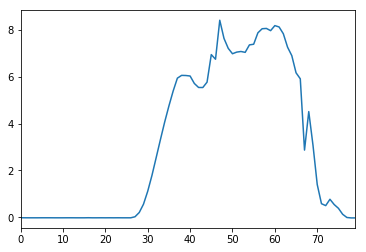

In [41]:
data['power'][:80].plot()

## time feature

+ year
+ quarter
+ month
+ weekday & holiday
+ time

In [11]:
from chinese_calendar import is_holiday

data['year'] = data['time'].dt.year
data['quarter'] = data['time'].dt.quarter
data['month'] = data['time'].dt.month
data['hour'] = data['time'].dt.hour
data['weekday'] = data['time'].dt.weekday
data['holiday'] = data['time'].apply(is_holiday).astype(int)

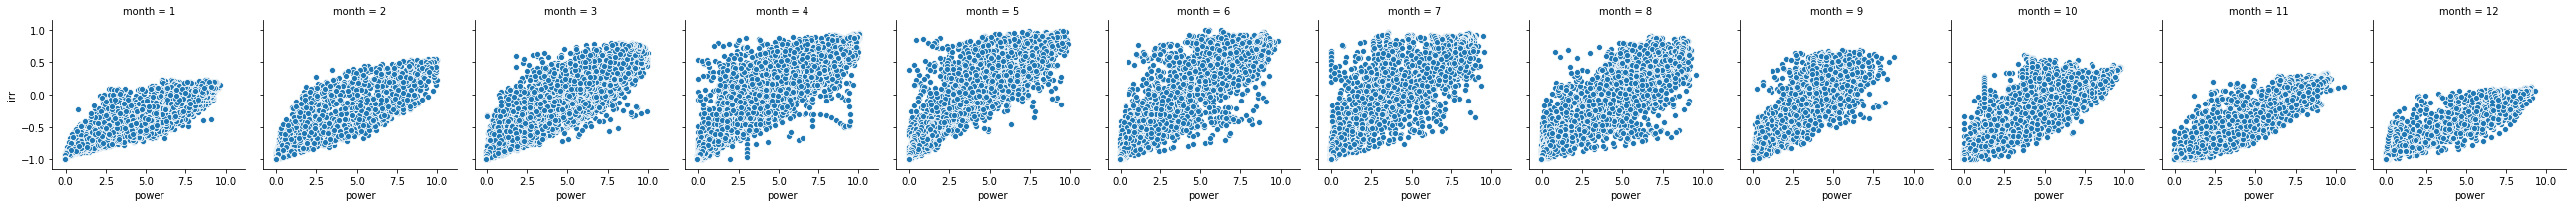

In [20]:
g = sns.FacetGrid(data=data, col='month')
g.map(sns.scatterplot, 'power', 'irr')

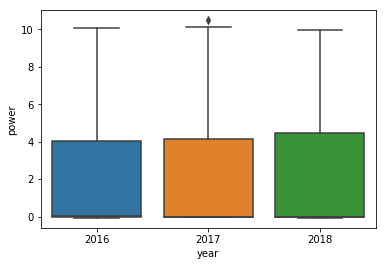

In [44]:
sns.boxplot(x='year', y='power', data=data)

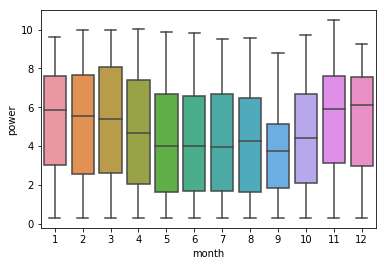

In [48]:
sns.boxplot(x='month', y='power', data=data[data.power>=0.3])

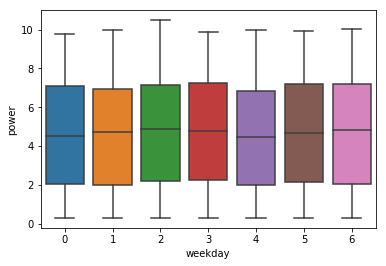

In [47]:
sns.boxplot(x='weekday', y='power', data=data[data.power>=0.3])

In [51]:
data.groupby("month")['power'].agg(['mean', 'min','max','std']).sort_values("mean")

,mean,min,max,std
month,,,,
9,1.625868,-0.045000,8.79567,2.236459
10,1.868730,-0.045000,9.73033,2.798507
12,1.953182,-0.042333,9.27700,3.034467
8,1.998528,-0.059333,9.58667,2.756599
1,2.027105,-0.035000,9.63133,3.090347
11,2.086416,-0.027000,10.48530,3.106669
7,2.116429,-0.058000,9.52533,2.841129
2,2.138745,-0.025333,9.98267,3.156874
5,2.160962,-0.028333,9.88700,2.921320
